# Figure 3B

In [1]:
# required libraries
import os
import random
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    #plt.title('Predicted clone velocities', y=1.05, size=65)
    plt.xlabel('AP position' + ' (' + r'$\mu$'+'m)')
    plt.ylabel('Velocity' + ' (' + r'$\mu$'+'m/day)')
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 42})
    filename = "./" + "Fig_3B.png"    
    fig.savefig(filename, dpi=300, bbox_inches='tight')   

<ipython-input-4-9771203186f0>:27: RuntimeWarning: Mean of empty slice.
  clones_pos_t.append(((positions-n0)*cell_diameter).mean())
/usr/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


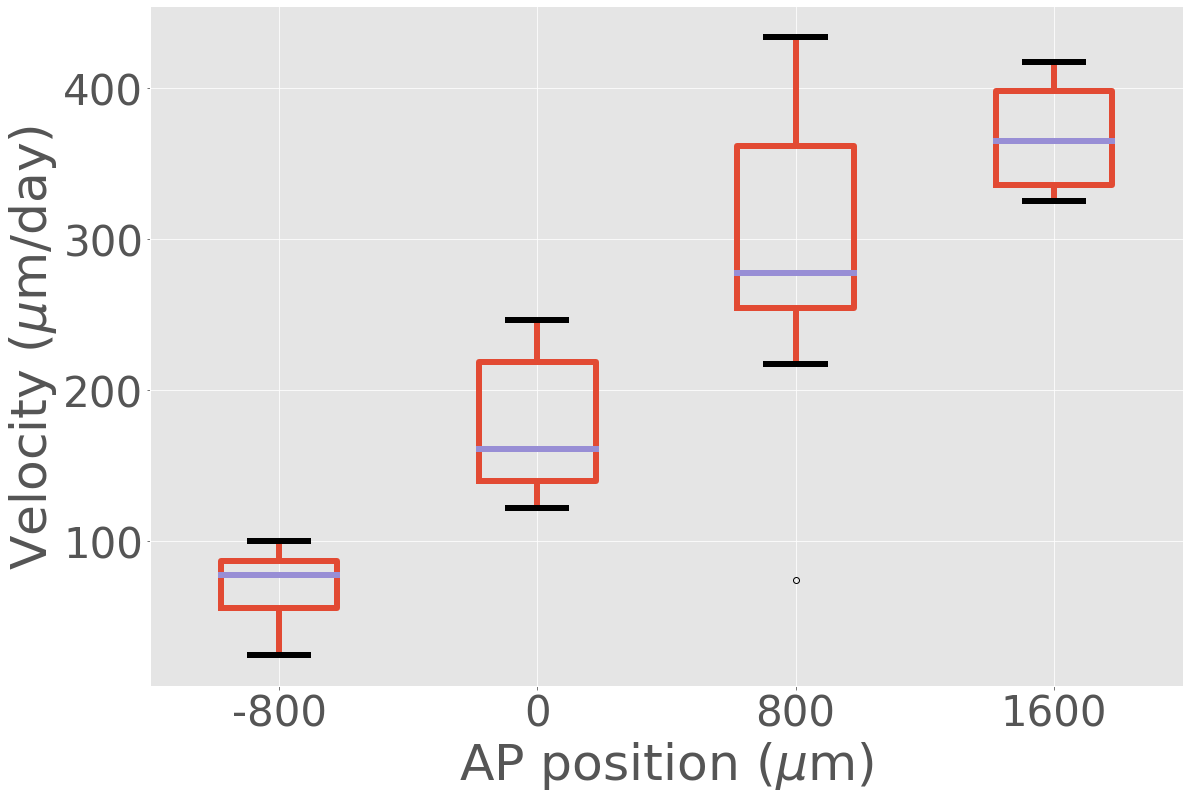

In [4]:
n0 = 200  # Number of cells after amputation
l = -1050  # Recruitment limit
tau = 24 # Delay
cell_diameter = 13.2

root = '../main/simulations/outgrowth/'
parameters_set = "n0="+str(n0)+"_l="+str(l)+"_tau="+str(tau)
folder = root+parameters_set+'/trajectories/'

times = range(0,8*24+1) 
clones_pos = np.arange(110,n0+5,5)    # From -1100 to 0um (50um by 50um). Similar to Rost et al.
bins = np.arange(-1200, 2800, 800)

files = os.listdir(folder)
ordered_files = sorted(files)

velocities = []
for clon, file in zip(clones_pos,ordered_files):
        velocities_bins = []
        opened_file = open(folder+file)
        df0 = pd.read_csv(opened_file, delimiter=',')
        cells = df0['positions']
        clones_pos_t = []
        for t in times:
            cells_clean = np.asarray(cells[t].split("]")[0].split()[1:]).astype(np.float)
            positions = np.argwhere(cells_clean==clon)
            clones_pos_t.append(((positions-n0)*cell_diameter).mean())
        clones_pos_t = np.asarray(clones_pos_t)
        digitized = np.digitize(clones_pos_t, bins)
        for j in range(1, len(bins)):
            if len(clones_pos_t[digitized==j]) != 0:
                slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(0, len(clones_pos_t[digitized==j])),clones_pos_t[digitized==j])
                velocities_bins.append(slope)
            else:
                velocities_bins.append(np.nan)
        velocities.append(velocities_bins)

fig = plt.figure()
ax = fig.add_subplot(111)

df = pd.DataFrame(np.asarray(velocities)*24)
bp = df.boxplot(boxprops=dict(linewidth=6),medianprops=dict(linewidth=6),whiskerprops=dict(linewidth=6),capprops=dict(linewidth=6))

plt.xticks([1,2,3,4],[-800,0,800,1600])

plot_create()